In [39]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
df = pd.read_csv("FIFA19.csv")
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,16,Luis García,37,https://cdn.sofifa.org/players/4/19/16.png,Spain,https://cdn.sofifa.org/flags/45.png,71,71,KAS Eupen,https://cdn.sofifa.org/teams/2/light/2013.png,...,79.0,70.0,43.0,40.0,9.0,12.0,13.0,11.0,11.0,€1.1M
1,41,Iniesta,34,https://cdn.sofifa.org/players/4/19/41.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,Vissel Kobe,https://cdn.sofifa.org/teams/2/light/101146.png,...,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M
2,80,E. Belözoğlu,37,https://cdn.sofifa.org/players/4/19/80.png,Turkey,https://cdn.sofifa.org/flags/48.png,79,79,Medipol Başakşehir FK,https://cdn.sofifa.org/teams/2/light/101014.png,...,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M
3,164,G. Pinzi,37,https://cdn.sofifa.org/players/4/19/164.png,Italy,https://cdn.sofifa.org/flags/27.png,70,70,Padova,https://cdn.sofifa.org/teams/2/light/110912.png,...,68.0,74.0,71.0,66.0,5.0,15.0,7.0,6.0,13.0,€372K
4,657,D. Vaughan,35,https://cdn.sofifa.org/players/4/19/657.png,Wales,https://cdn.sofifa.org/flags/50.png,66,66,Notts County,https://cdn.sofifa.org/teams/2/light/1937.png,...,82.0,59.0,66.0,62.0,6.0,9.0,10.0,9.0,7.0,€263K


In [14]:
df.shape

(18207, 88)

In [15]:
data = df[["Value", "Age", "Overall", "International Reputation", "Stamina"]]
data.head()

,Value,Age,Overall,International Reputation,Stamina
0,€750K,37,71,1.0,64.0
1,€21.5M,34,86,4.0,55.0
2,€4M,37,79,2.0,61.0
3,€240K,37,70,2.0,74.0
4,€150K,35,66,1.0,50.0


In [16]:
data.isnull().sum()

Value                        0
Age                          0
Overall                      0
International Reputation    48
Stamina                     48
dtype: int64

In [17]:
data.dropna(inplace = True)
data.describe()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Age,Overall,International Reputation,Stamina
count,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122529,66.249904,1.113222,63.219946
std,4.670568,6.914613,0.394031,15.894741
min,16.000000,46.000000,1.000000,12.000000
25%,21.000000,62.000000,1.000000,56.000000
50%,25.000000,66.000000,1.000000,66.000000
75%,28.000000,71.000000,1.000000,74.000000
max,45.000000,94.000000,5.000000,96.000000


In [18]:
data.dtypes

Value                        object
Age                           int64
Overall                       int64
International Reputation    float64
Stamina                     float64
dtype: object

In [19]:
data["Value"] = data.Value.str.replace('€','').astype(str)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
data["Value"] = data.Value.str.replace('M', "").astype(str)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
data["Value"] = data.Value.str.replace('.',',').astype(str)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
excel = data.to_excel("FIFA19_2.xlsx")

In [68]:
data["Value"] = data.Value.str.replace('K','').astype(str)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
data["Value"] = data.Value.str.replace('K','').astype(str)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
data.head()

,Value,Age,Overall,International Reputation,Stamina
0,750,37,71,1.0,64.0
1,215,34,86,4.0,55.0
2,4,37,79,2.0,61.0
3,240,37,70,2.0,74.0
4,150,35,66,1.0,50.0


In [57]:
data.dtypes

Value                        object
Age                           int64
Overall                       int64
International Reputation    float64
Stamina                     float64
dtype: object

In [15]:
data.isnull().sum()

Value                       0
Age                         0
Overall                     0
International Reputation    0
Stamina                     0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 18206
Data columns (total 5 columns):
Value                       18159 non-null float64
Age                         18159 non-null int64
Overall                     18159 non-null int64
International Reputation    18159 non-null float64
Stamina                     18159 non-null float64
dtypes: float64(3), int64(2)
memory usage: 851.2 KB


In [58]:
data.describe()

,Age,Overall,International Reputation,Stamina
count,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122529,66.249904,1.113222,63.219946
std,4.670568,6.914613,0.394031,15.894741
min,16.000000,46.000000,1.000000,12.000000
25%,21.000000,62.000000,1.000000,56.000000
50%,25.000000,66.000000,1.000000,66.000000
75%,28.000000,71.000000,1.000000,74.000000
max,45.000000,94.000000,5.000000,96.000000


In [16]:
x = data[["Age", "Overall", "International Reputation", "Stamina"]]
x.head()

,Age,Overall,International Reputation,Stamina
0,37,71,1.0,64.0
1,34,86,4.0,55.0
2,37,79,2.0,61.0
3,37,70,2.0,74.0
4,35,66,1.0,50.0


In [17]:
x.describe()

,Age,Overall,International Reputation,Stamina
count,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122529,66.249904,1.113222,63.219946
std,4.670568,6.914613,0.394031,15.894741
min,16.000000,46.000000,1.000000,12.000000
25%,21.000000,62.000000,1.000000,56.000000
50%,25.000000,66.000000,1.000000,66.000000
75%,28.000000,71.000000,1.000000,74.000000
max,45.000000,94.000000,5.000000,96.000000


In [19]:
y = data[["Value"]]
y.head()

,Value
0,750.0
1,21.5
2,4.0
3,240.0
4,150.0


In [20]:
y.describe()

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


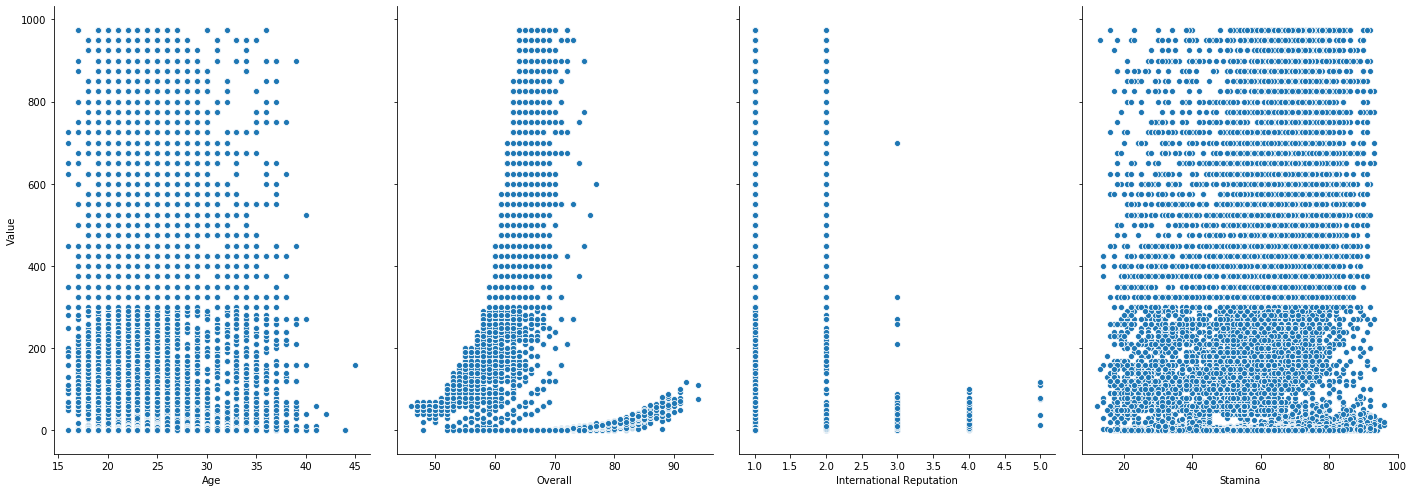

In [21]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=["Age", "Overall", "International Reputation", "Stamina"], y_vars="Value", size=7, aspect=0.7)

ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

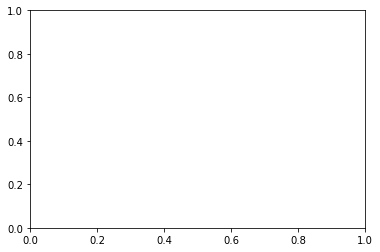

In [24]:
g = sns.regplot(x, y, ci=None, scatter_kws={"color":"r", "s":9})
g.set_ylabel("Value")
g.set_xlabel("Overall", "Age", "Stamina")
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [70]:
df2 = pd.read_csv("FIFA19_2.csv", delimiter = ";")
df2.head()

,Unnamed: 0,Value,Age,Overall,International Reputation,Stamina
0,0,750K,37,71,1,64
1,1,21500,34,86,4,55
2,2,4000,37,79,2,61
3,3,240K,37,70,2,74
4,4,150K,35,66,1,50


In [71]:
df2["Value"] = df2.Value.str.replace('K','').astype(float)

In [72]:
df2.head()

,Unnamed: 0,Value,Age,Overall,International Reputation,Stamina
0,0,750.0,37,71,1,64
1,1,21500.0,34,86,4,55
2,2,4000.0,37,79,2,61
3,3,240.0,37,70,2,74
4,4,150.0,35,66,1,50


In [73]:
df3 = df2[["Value", "Age", "Overall", "International Reputation", "Stamina"]]
df3.head()

,Value,Age,Overall,International Reputation,Stamina
0,750.0,37,71,1,64
1,21500.0,34,86,4,55
2,4000.0,37,79,2,61
3,240.0,37,70,2,74
4,150.0,35,66,1,50


In [74]:
df3.to_csv("FIFA19_son.csv", index = False)

In [75]:
"Veri Setimiz Nihayet Düzenlendi :-) Şimdi Başlıyoruz!

SyntaxError: EOL while scanning string literal (<ipython-input-75-585efce0a497>, line 1)

In [76]:
df3.info()

In [78]:
df3.describe()

,Value,Age,Overall,International Reputation,Stamina
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,2416.131395,25.122529,66.249904,1.113222,63.219946
std,5601.319279,4.670568,6.914613,0.394031,15.894741
min,0.000000,16.000000,46.000000,1.000000,12.000000
25%,300.000000,21.000000,62.000000,1.000000,56.000000
50%,675.000000,25.000000,66.000000,1.000000,66.000000
75%,2000.000000,28.000000,71.000000,1.000000,74.000000
max,118500.000000,45.000000,94.000000,5.000000,96.000000


In [79]:
x = df3[["Age", "Overall", "International Reputation", "Stamina"]]
x.head()

,Age,Overall,International Reputation,Stamina
0,37,71,1,64
1,34,86,4,55
2,37,79,2,61
3,37,70,2,74
4,35,66,1,50


In [80]:
y = df3[["Value"]]
y.head()

,Value
0,750.0
1,21500.0
2,4000.0
3,240.0
4,150.0


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


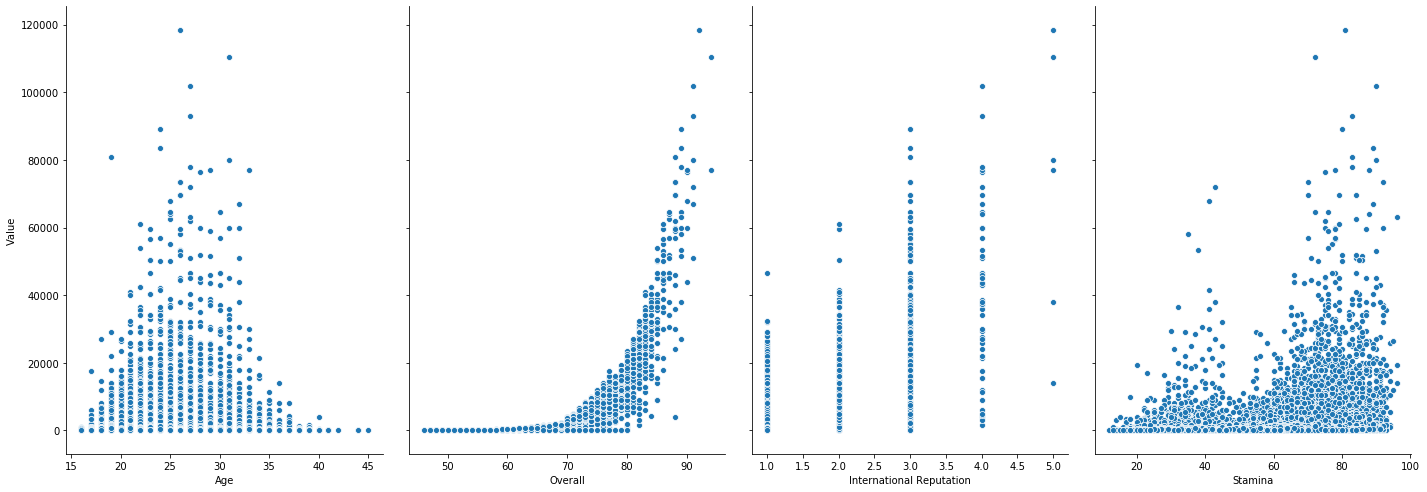

In [81]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df3, x_vars=["Age", "Overall", "International Reputation", "Stamina"], y_vars="Value", size=7, aspect=0.7)

In [86]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='Value ~ Overall', data=df3).fit()

# print the coefficients
lm1.params

Intercept   -31228.459311
Overall        507.843617
dtype: float64

In [88]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['Overall']
X = df3[feature_cols]
y = df3.Value

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

-31228.459310748272
[507.84361731]


In [90]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'Overall': [80]})

# predict for a new observation
lm1.predict(X_new)

0    9399.030074
dtype: float64

In [93]:
### SCIKIT-LEARN ###

# predict for a new observation
lm2.predict(80)

ValueError: Expected 2D array, got 1D array instead:
array=[80].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


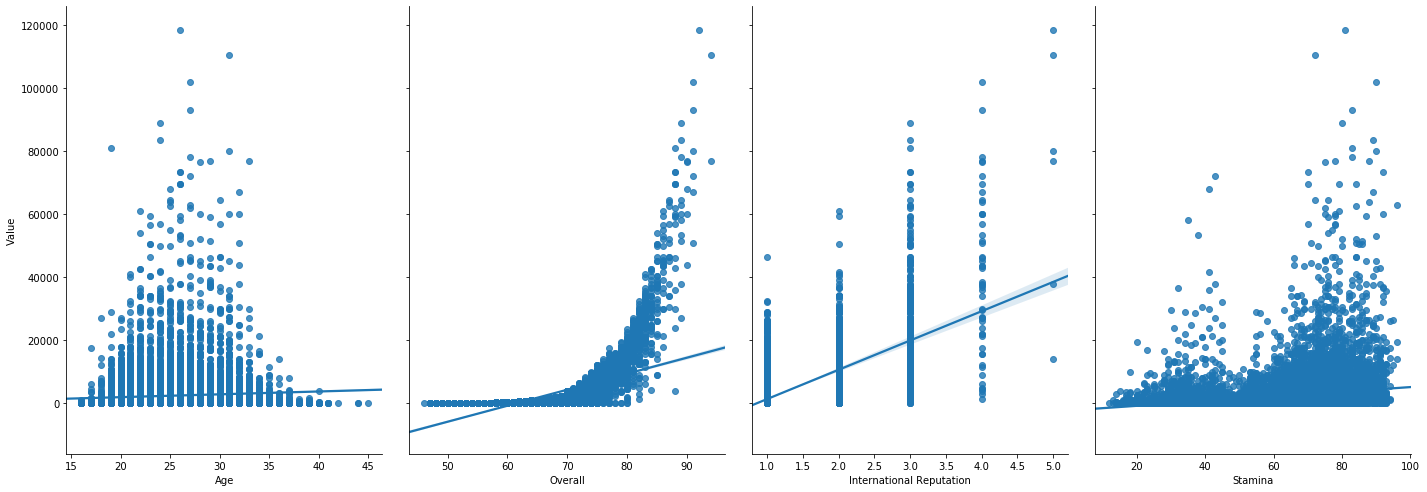

In [94]:
sns.pairplot(df3, x_vars=["Age", "Overall", "International Reputation", "Stamina"], y_vars='Value', size=7, aspect=0.7, kind='reg')

In [95]:
### STATSMODELS ###  MULTIPLE LINEAR REGRESSION

# create a fitted model with all three features
lm1 = smf.ols(formula='Value ~ Overall + International Reputation + Stamina', data=df3).fit()

# print the coefficients
lm1.params

SyntaxError: invalid syntax (<unknown>, line 1)

In [96]:
### SCIKIT-LEARN ###  MULTIPLE LINEAR REGRESSION

# create X and y
feature_cols = ['Overall', 'International Reputation', 'Stamina']
X = df3[feature_cols]
y = df3.Value

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

-26287.156985630238
[ 315.9712828  6482.09386928    8.76639844]


In [97]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('Overall', 315.97128280120165),
 ('International Reputation', 6482.093869277913),
 ('Stamina', 8.766398443665821)]